In [ ]:
!nvidia-smi

Thu Jun 27 08:05:16 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


**Ganti Runtime ke GPU sebelum menjalankan kode**

In [ ]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 240MB/s]
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 76.9MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 96.3ms
Speed: 13.5ms preprocess, 96.3ms inference, 666.2ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

/content


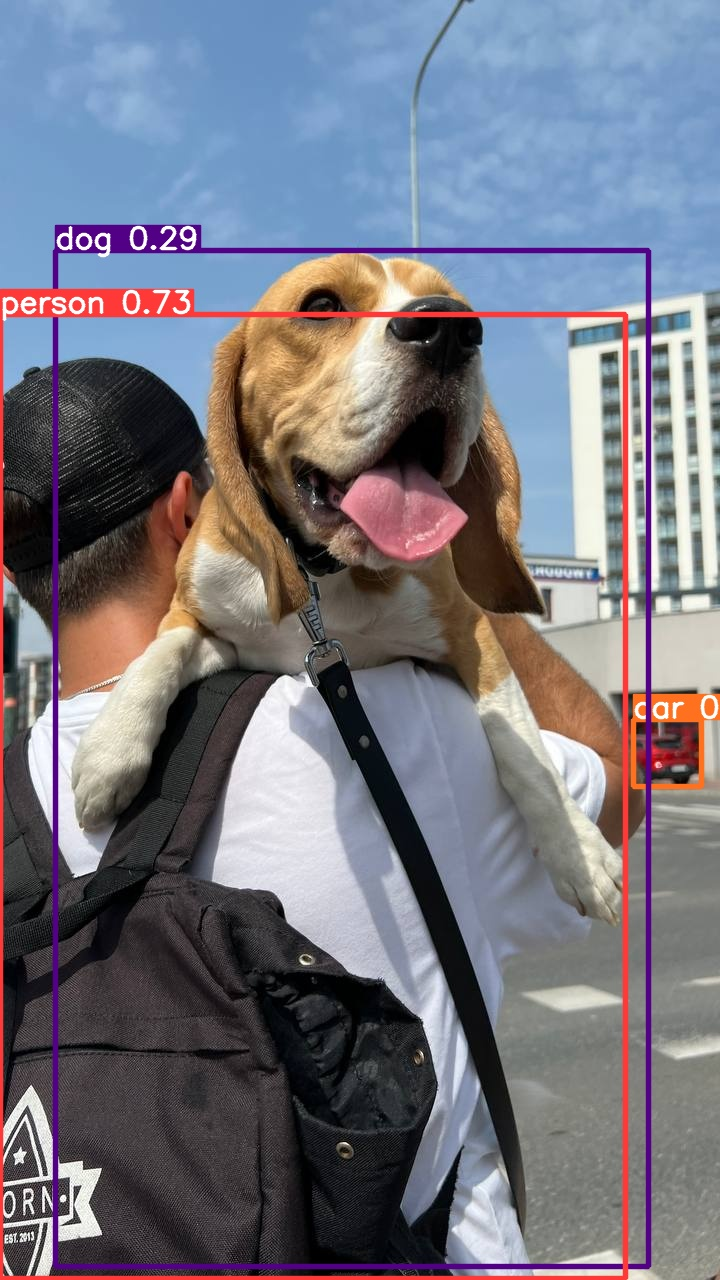

In [ ]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

**Sesuaikan dengan database dari Roboflow**

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="7PCtOHgYDMeSQrUwMeGw")
project = rf.workspace("orkhan-aliyev-8nktf").project("fruits-and-vegetables-2vf7u")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Fruits-and-Vegetables-1 in yolov8:: 100%|██████████| 18246/18246 [00:03<00:00, 5239.30it/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=320 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 83.9MB/s]
New https://pypi.org/project/ultralytics/8.2.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Fruits-and-Vegetables-1/data.yaml, epochs=10, patience=50, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					    PR_curve.png	   val_batch0_pred.jpg
confusion_matrix_normalized.png			    R_curve.png		   val_batch1_labels.jpg
confusion_matrix.png				    results.csv		   val_batch1_pred.jpg
events.out.tfevents.1719475674.823de8d40a8b.2667.0  results.png		   val_batch2_labels.jpg
F1_curve.png					    train_batch0.jpg	   val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch1.jpg	   weights
labels.jpg					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


/content


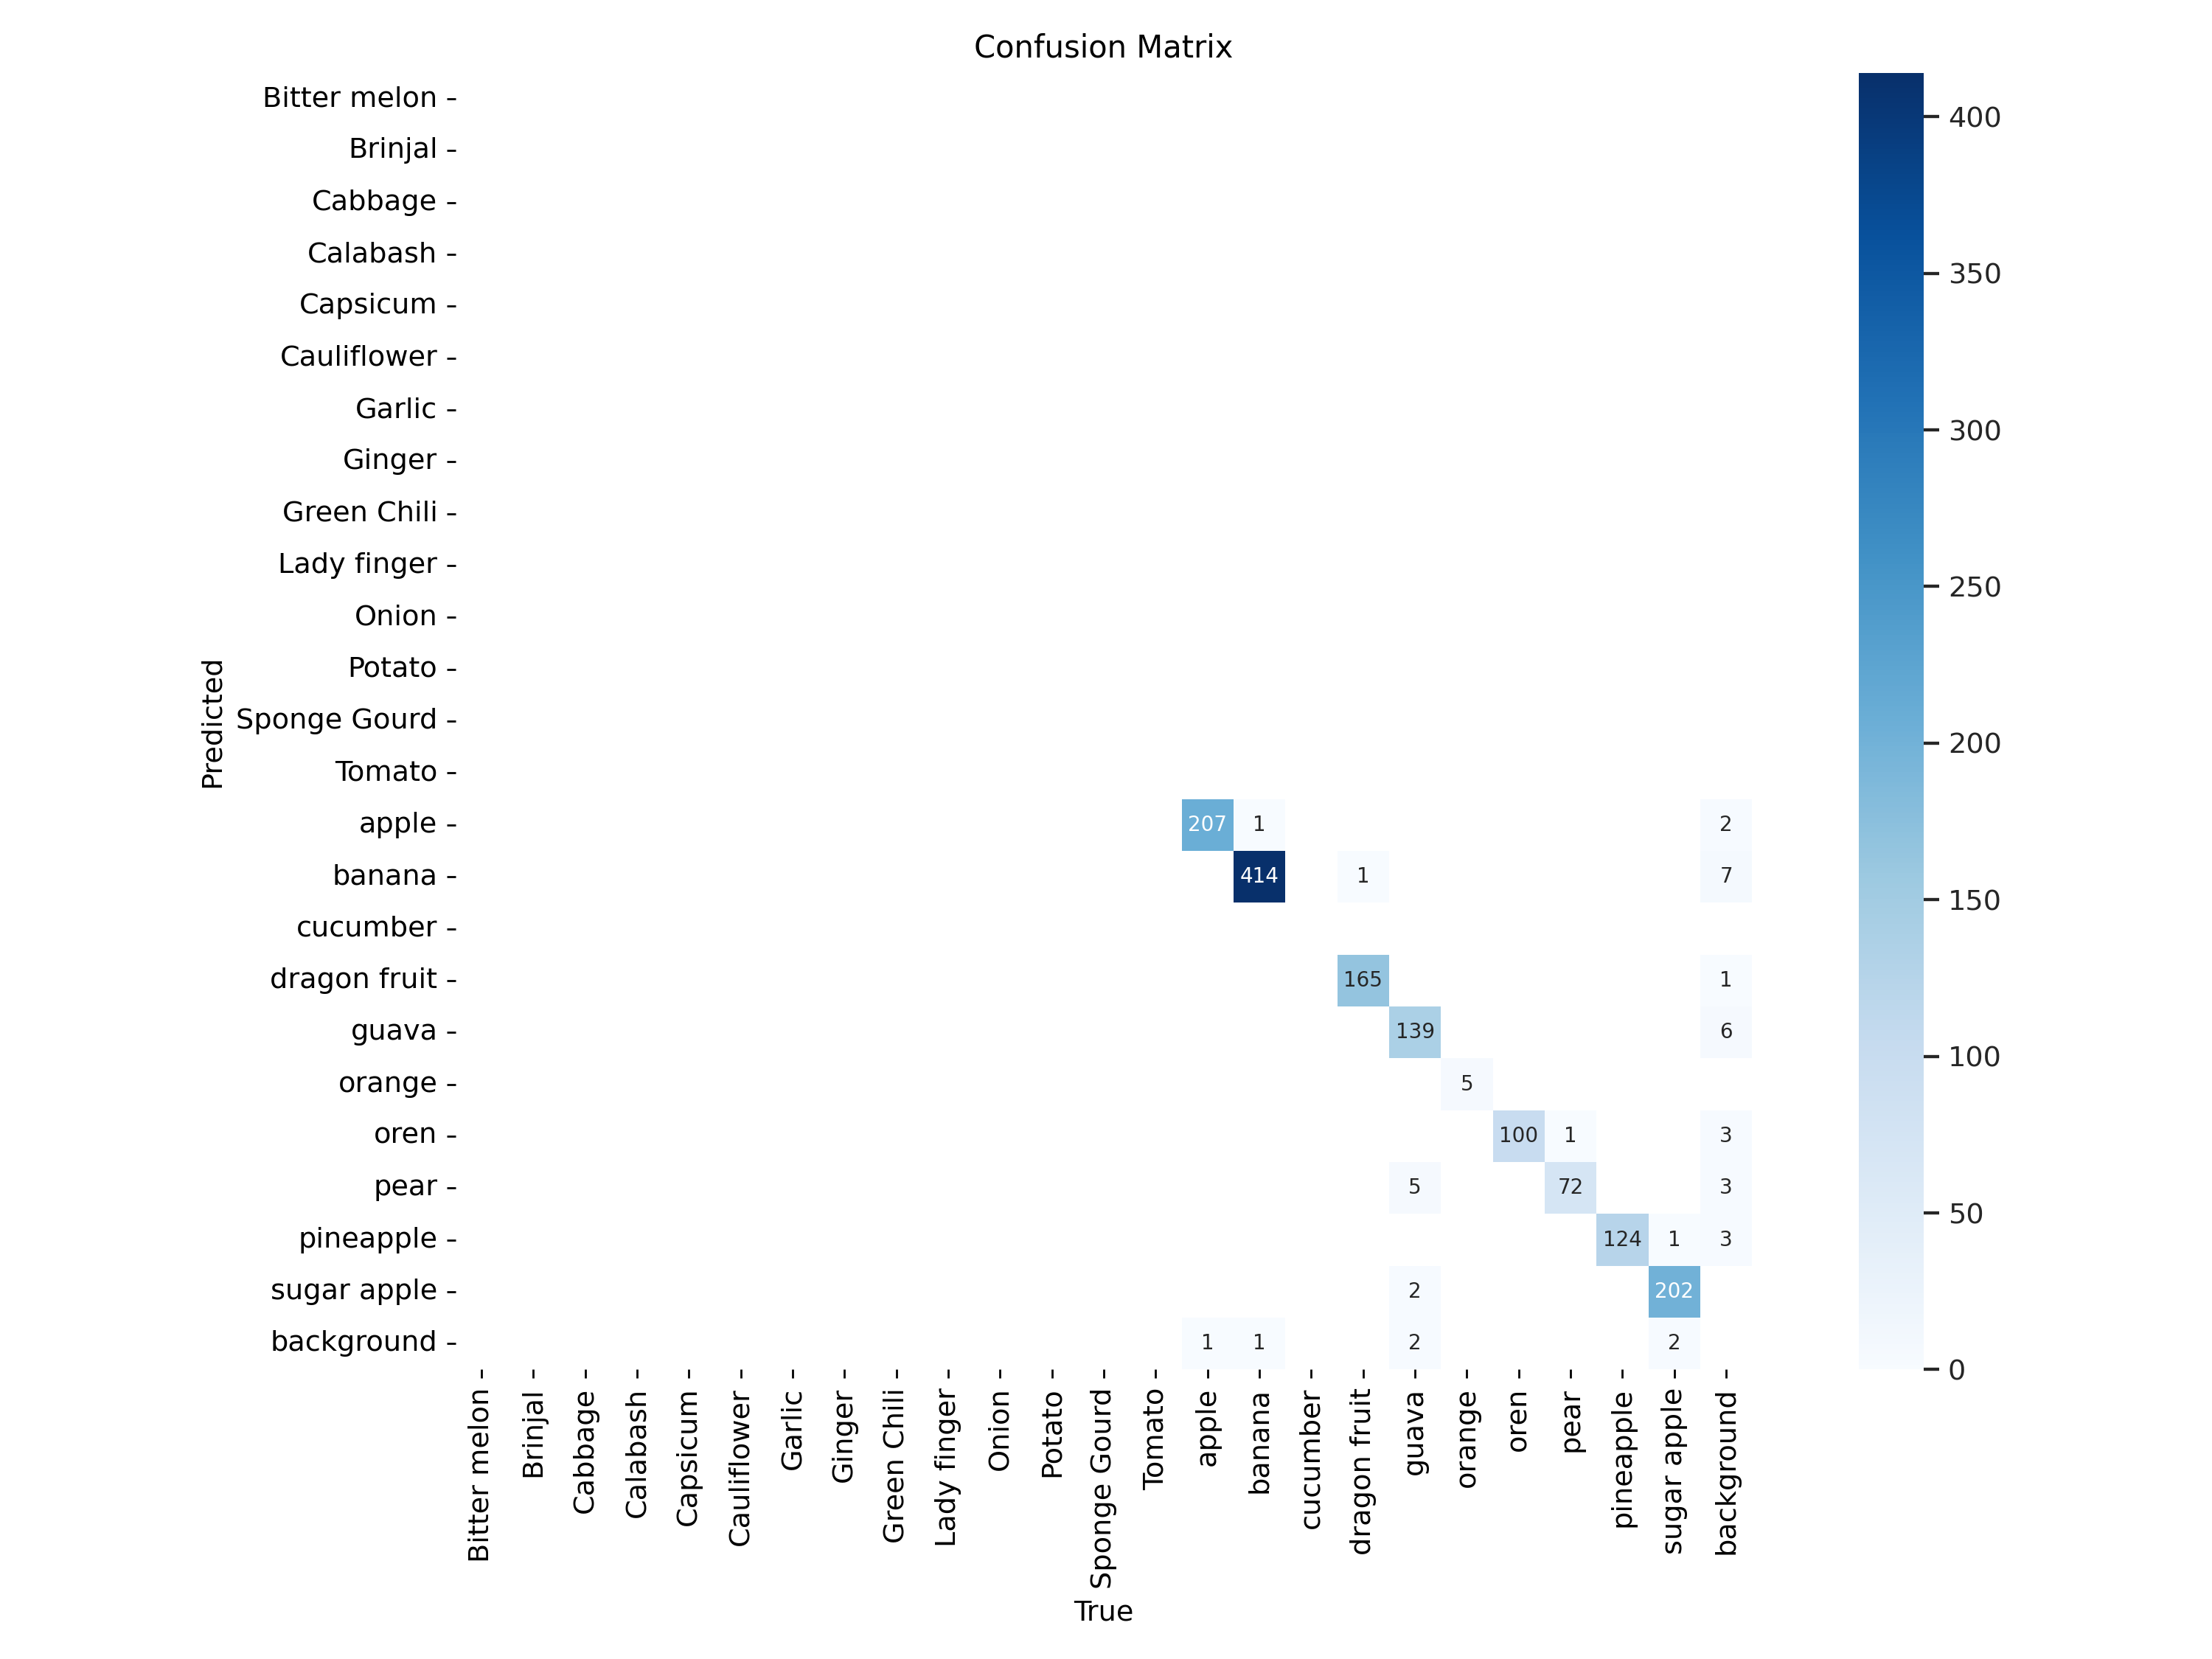

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


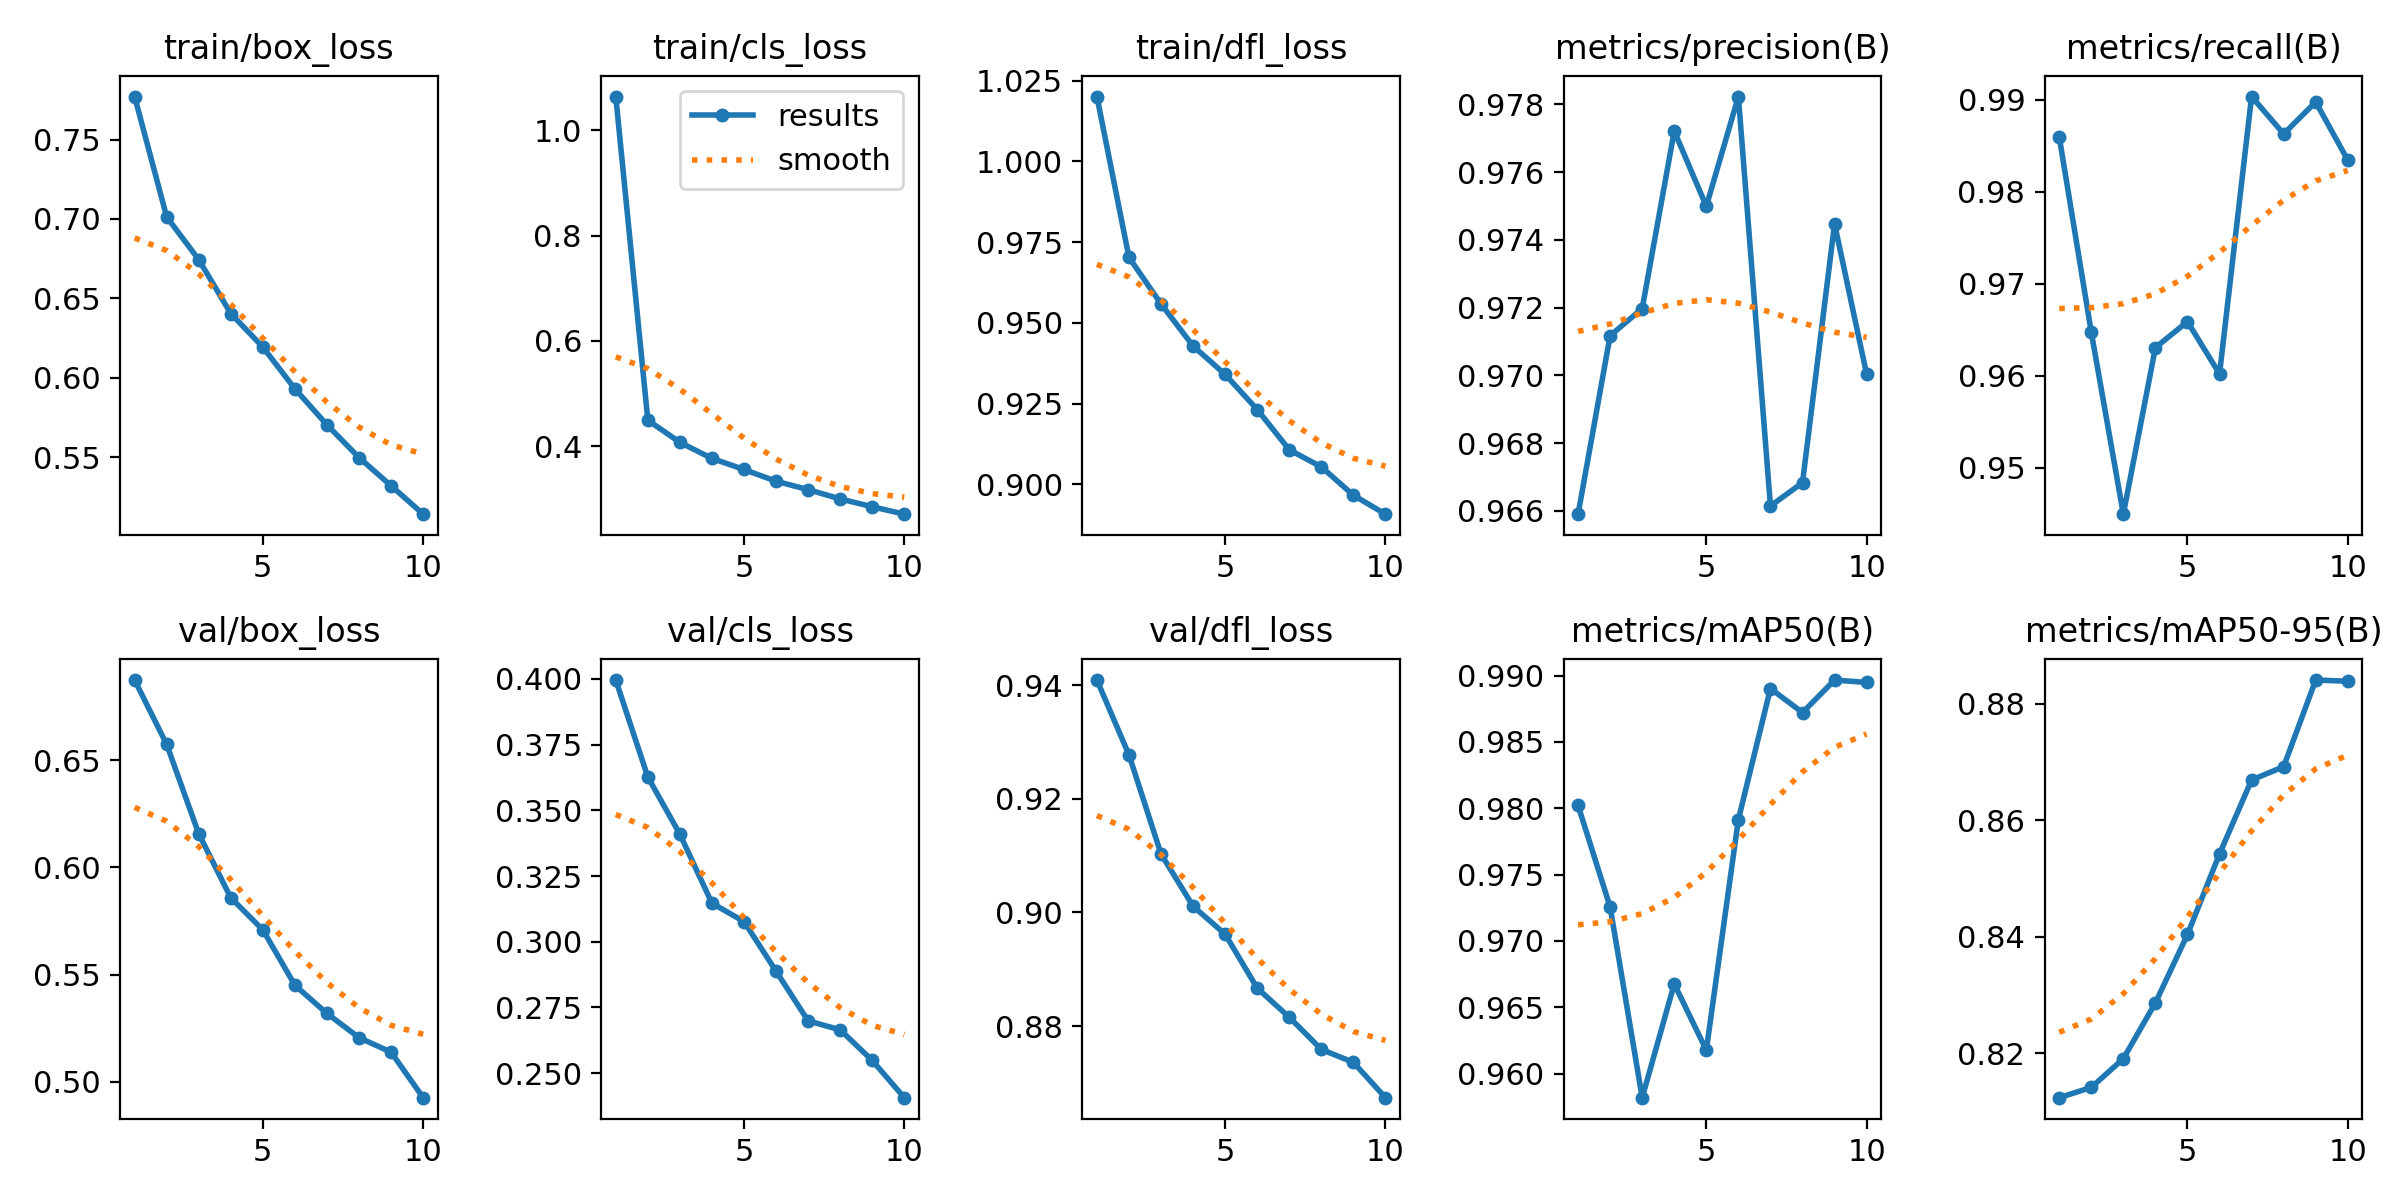

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


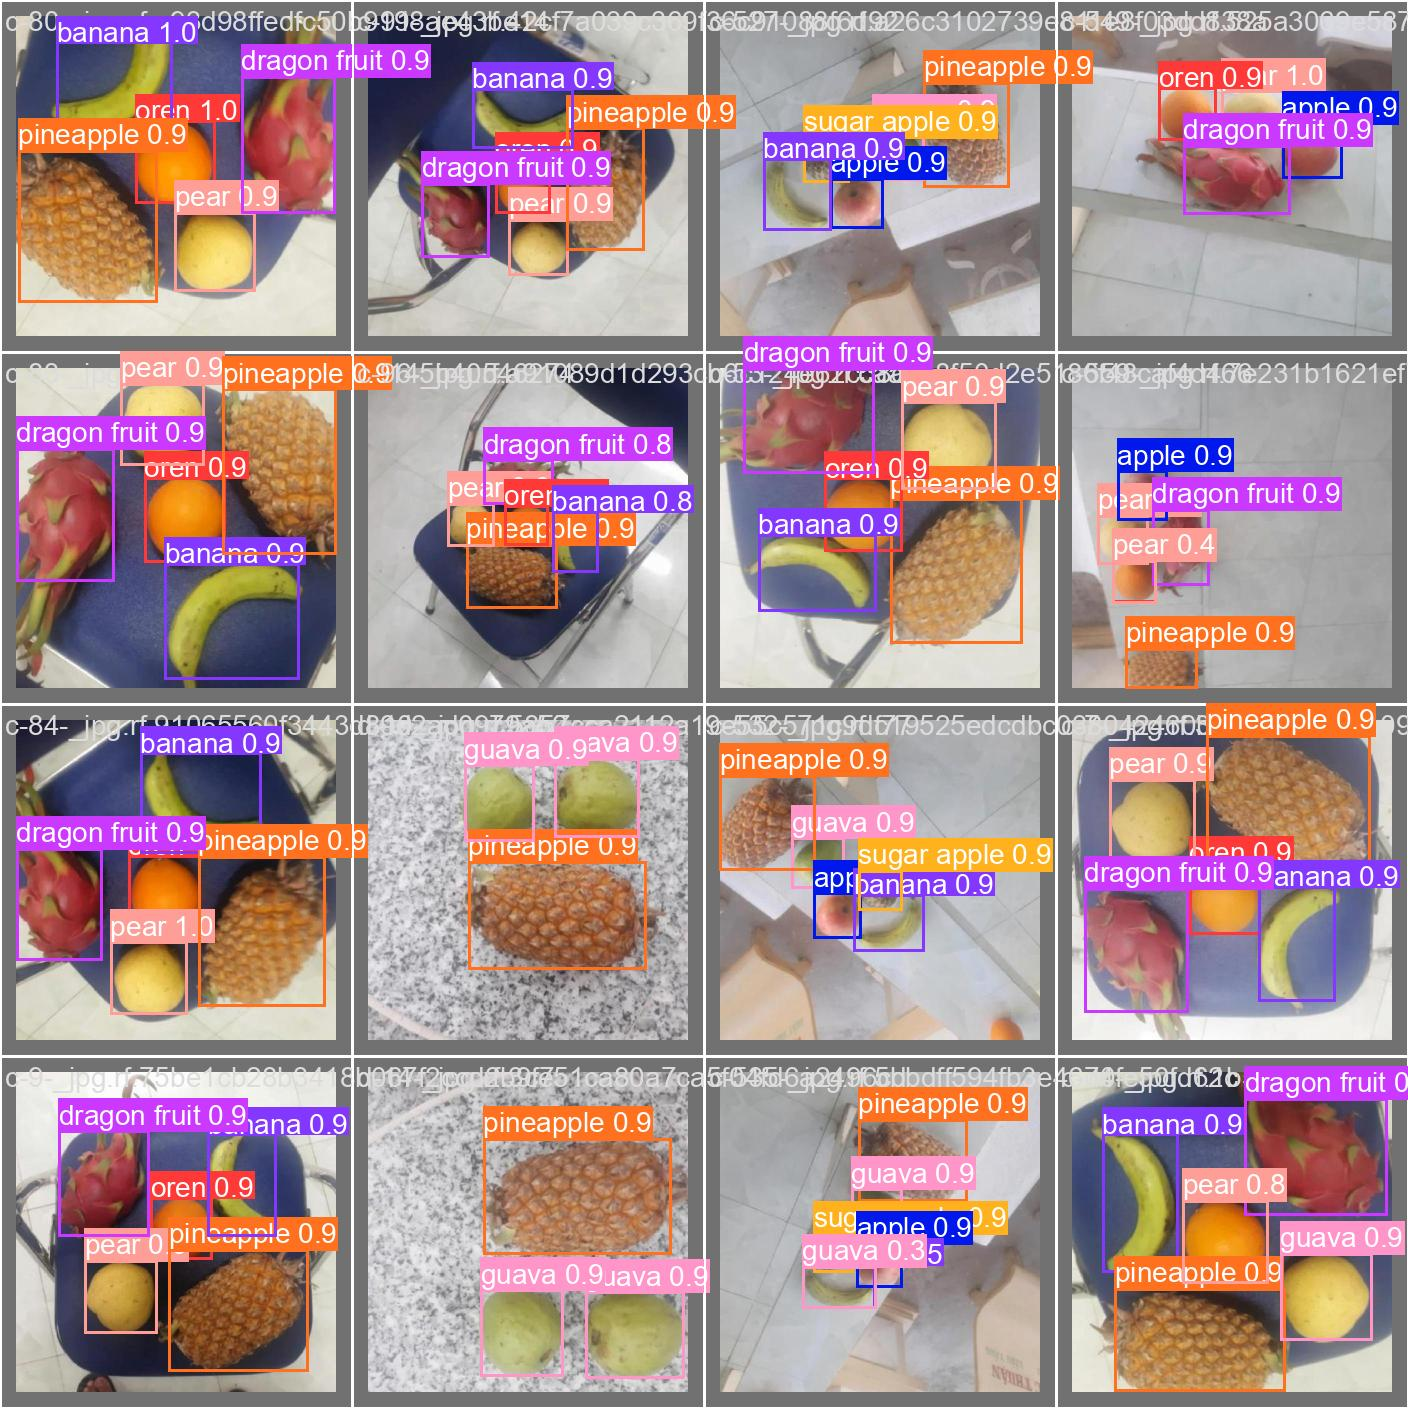

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Fruits-and-Vegetables-1/valid/labels.cache... 308 images, 0 backgrounds, 0 corrupt: 100% 308/308 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 20/20 [00:07<00:00,  2.55it/s]
                   all        308       1445      0.974       0.99       0.99      0.884
                 apple        308        208       0.99      0.992      0.993      0.904
                banana        308        416      0.982      0.998      0.995      0.874
          dragon fruit        308        166      0.994      0.998      0.995      0.851
                 guava        308        148      0.979      0.938      0.987      0.908
                orange        308          5          1      0.997      0.995      0.814
                

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients, 28.5 GFLOPs

image 1/893 /content/datasets/Fruits-and-Vegetables-1/test/images/Data-2-1-_jpg.rf.684f231f629ccb9b8facef0fb9bed2a9.jpg: 320x320 1 apple, 9.9ms
image 2/893 /content/datasets/Fruits-and-Vegetables-1/test/images/Data-2-10-_jpg.rf.055c3d1158e8b4cb467b72d1de0b5709.jpg: 320x320 2 apples, 1 banana, 8.2ms
image 3/893 /content/datasets/Fruits-and-Vegetables-1/test/images/Data-2-11-_jpg.rf.39452fad45ecdaa6110368736bcec4f1.jpg: 320x320 2 apples, 8.0ms
image 4/893 /content/datasets/Fruits-and-Vegetables-1/test/images/Data-2-11-_jpg.rf.52ad6f6cfaf21ff198f2fdcf965d8520.jpg: 320x320 1 apple, 8.0ms
image 5/893 /content/datasets/Fruits-and-Vegetables-1/test/images/Data-2-11-_jpg.rf.e72df0b18a5c288d03c5902991c6bc49.jpg: 320x320 1 apple, 1 banana, 8.0ms
image 6/893 /content/datasets/Fruits-and-Vegetables-1/test/images/Data-2-12

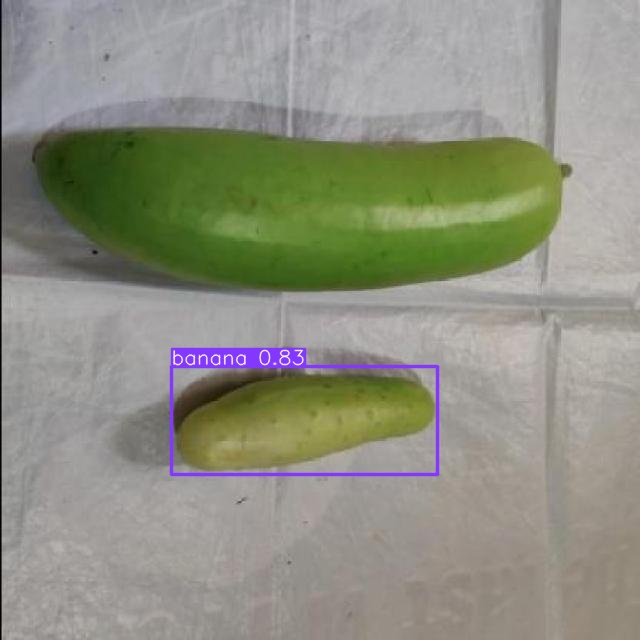

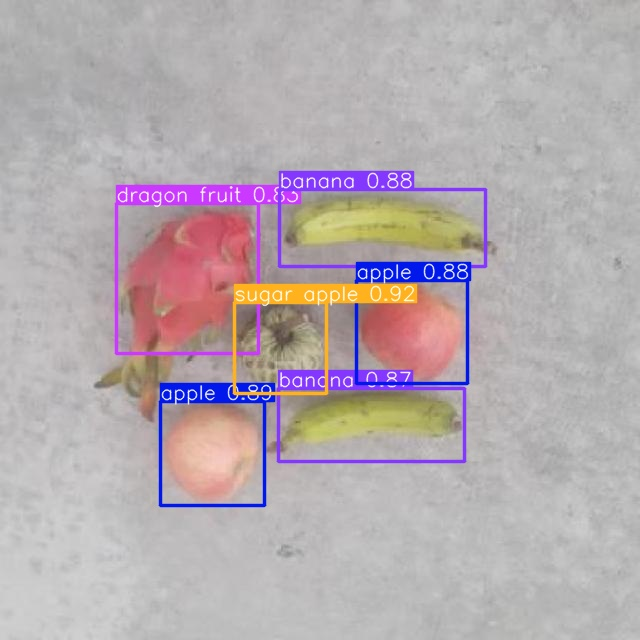

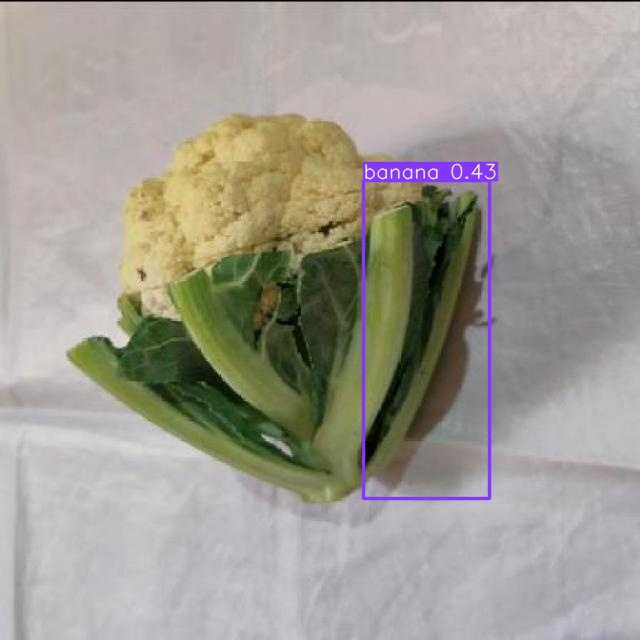

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cp -av "/content/runs" "/content/drive/MyDrive/YoloApel2"

'/content/runs' -> '/content/drive/MyDrive/YoloApel2'
'/content/runs/detect' -> '/content/drive/MyDrive/YoloApel2/detect'
'/content/runs/detect/predict' -> '/content/drive/MyDrive/YoloApel2/detect/predict'
'/content/runs/detect/predict/dog.jpeg' -> '/content/drive/MyDrive/YoloApel2/detect/predict/dog.jpeg'
'/content/runs/detect/train' -> '/content/drive/MyDrive/YoloApel2/detect/train'
'/content/runs/detect/train/weights' -> '/content/drive/MyDrive/YoloApel2/detect/train/weights'
'/content/runs/detect/train/weights/last.pt' -> '/content/drive/MyDrive/YoloApel2/detect/train/weights/last.pt'
'/content/runs/detect/train/weights/best.pt' -> '/content/drive/MyDrive/YoloApel2/detect/train/weights/best.pt'
'/content/runs/detect/train/args.yaml' -> '/content/drive/MyDrive/YoloApel2/detect/train/args.yaml'
'/content/runs/detect/train/events.out.tfevents.1719475674.823de8d40a8b.2667.0' -> '/content/drive/MyDrive/YoloApel2/detect/train/events.out.tfevents.1719475674.823de8d40a8b.2667.0'
'/content/

**Disconnect Runtime dan ganti ke CPU**

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.6/793.6 kB 4.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/YoloApel2/detect/train/weights/best.pt", "/content")

'/content/best.pt'

In [ ]:
!yolo export model=/content/best.pt format=tflite

Ultralytics YOLOv8.2.45 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11134872 parameters, 0 gradients, 28.5 GFLOPs

PyTorch: starting from '/content/best.pt' with input shape (1, 3, 320, 320) BCHW and output shape(s) (1, 28, 2100) (21.5 MB)
requirements: Ultralytics requirements ['sng4onnx>=1.0.1', 'onnx_graphsurgeon>=0.3.26', 'onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'onnxslim>=0.1.31', 'tflite_support', 'onnxruntime'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 965.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 125.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 117.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 42.4 MB/s eta 0:00:00
    

In [ ]:
%cp -av "/content/best_saved_model" "/content/drive/MyDrive/YoloApel2"

'/content/best_saved_model' -> '/content/drive/MyDrive/YoloApel2/best_saved_model'
'/content/best_saved_model/variables' -> '/content/drive/MyDrive/YoloApel2/best_saved_model/variables'
'/content/best_saved_model/variables/variables.data-00000-of-00001' -> '/content/drive/MyDrive/YoloApel2/best_saved_model/variables/variables.data-00000-of-00001'
'/content/best_saved_model/variables/variables.index' -> '/content/drive/MyDrive/YoloApel2/best_saved_model/variables/variables.index'
'/content/best_saved_model/assets' -> '/content/drive/MyDrive/YoloApel2/best_saved_model/assets'
'/content/best_saved_model/saved_model.pb' -> '/content/drive/MyDrive/YoloApel2/best_saved_model/saved_model.pb'
'/content/best_saved_model/fingerprint.pb' -> '/content/drive/MyDrive/YoloApel2/best_saved_model/fingerprint.pb'
'/content/best_saved_model/best_float32.tflite' -> '/content/drive/MyDrive/YoloApel2/best_saved_model/best_float32.tflite'
'/content/best_saved_model/best_float16.tflite' -> '/content/drive/MyD